In [1]:
#IMPORT LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

In [2]:
#READ FILE WITH PANDAS
file = pd.read_csv('C:/Users/PISHTAAZ SOFTWARE/AppData/Local/Temp/Temp1_archive (1).zip/Housing.csv')


In [3]:
# READ FILE DATA
file.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# INFORMATION OF DATA IN FILE
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# SHOW (MIN, MAX, Q1, Q2, Q3,MEAN, STD)
file.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: ylabel='price'>

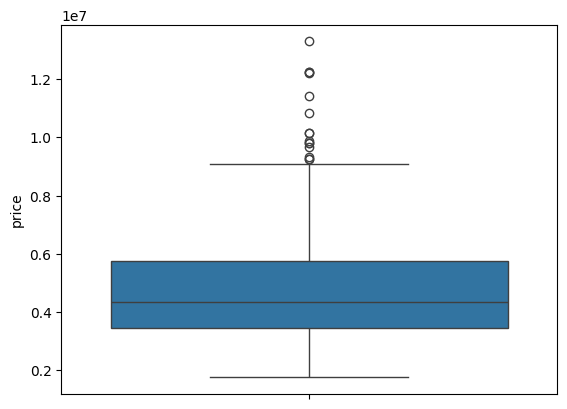

In [6]:
# SHOW (MIN, MAX, Q1, Q2, Q3,MEAN, OUTLYING DATA) USING BOXPLOT
sns.boxplot(file['price'])

In [7]:
# IMPORT SCIPY TO SHOW OUTLYING DATA
import scipy.stats as stats

In [8]:
file['zr'] = stats.zscore(file['price'])

In [9]:
file['zr']

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: zr, Length: 545, dtype: float64

In [10]:
file[(file['zr'] < -3) | (file['zr'] > 3)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,zr
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.554979
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,3.255309


In [11]:
# CLEAN 5 OUTLYING DATA THAT THIER ZSCORE IS NOT BETWEEN (-3,3)
newfile = file[(file['zr'] > -3) & (file['zr'] < 3)].reset_index() 

<Axes: ylabel='price'>

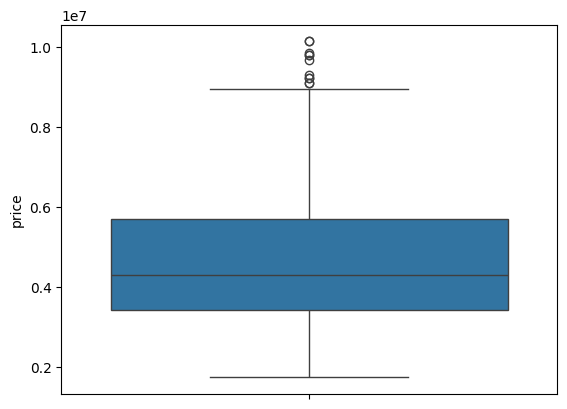

In [12]:
sns.boxplot(newfile['price'])

In [13]:
# REMAINDER OUTLYING DATA USING INTER QUANTILE RANGE
Q1 = newfile.price.quantile(0.25)
Q2 = newfile.price.quantile(0.50)
Q3 = newfile.price.quantile(0.75)
IQR = Q3 - Q1
lc = Q1 - (1.5 * IQR)
uc = Q3 + (1.5 * IQR)
display(lc)
display(uc)

30625.0

9095625.0

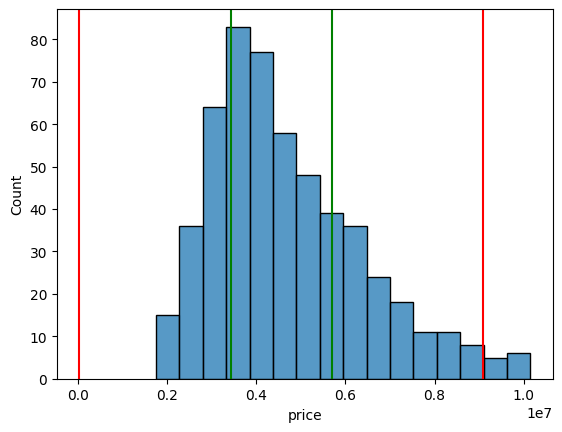

In [14]:
# DISPLAY THEM IN HISTPLOT
sns.histplot(newfile.price)
plt.axvline(lc, color = 'r')
plt.axvline(uc, color = 'r')
plt.axvline(Q1, color = 'g')
plt.axvline(Q3, color = 'g')

In [15]:
# show ALL REMAINDER OUTLYING DATA 
newfile[(newfile.price < lc) | (newfile.price > uc)]


,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,zr
0,6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,2.880722
1,7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,2.880722
2,8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,2.730887
3,9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,2.693428
4,10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,2.693428
5,11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,2.629748
6,12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished,2.431217
7,13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished,2.393758
8,14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished,2.393758
9,15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,2.318841


In [16]:
# DELETE ALL REMAINDER OUTLYING DATA 
new = newfile[(newfile.price > lc) & (newfile.price < uc)].reset_index()

In [17]:
# SHOW NEW FILE INFORMATIN WITHOUT OUTLYING DATA
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_0           528 non-null    int64  
 1   index             528 non-null    int64  
 2   price             528 non-null    int64  
 3   area              528 non-null    int64  
 4   bedrooms          528 non-null    int64  
 5   bathrooms         528 non-null    int64  
 6   stories           528 non-null    int64  
 7   mainroad          528 non-null    object 
 8   guestroom         528 non-null    object 
 9   basement          528 non-null    object 
 10  hotwaterheating   528 non-null    object 
 11  airconditioning   528 non-null    object 
 12  parking           528 non-null    int64  
 13  prefarea          528 non-null    object 
 14  furnishingstatus  528 non-null    object 
 15  zr                528 non-null    float64
dtypes: float64(1), int64(8), object(7)
memory us

<Axes: ylabel='price'>

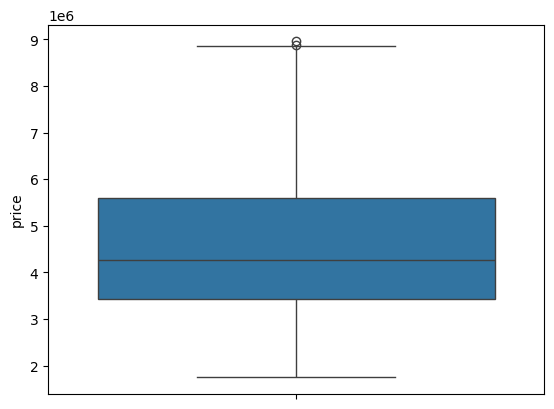

In [18]:
sns.boxplot(new['price'])

In [19]:
# CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES
featurs = ['guestroom','airconditioning','basement','mainroad','prefarea','hotwaterheating','furnishingstatus']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new[featurs] = new[featurs].apply(le.fit_transform)
new.head()

,level_0,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,zr
0,11,17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,2.243923
1,12,18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,2.206465
2,13,19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,2.187735
3,14,20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1,2.131547
4,15,21,8680000,7155,3,2,1,1,1,1,0,1,2,0,2,2.094088


In [20]:
# SCALING ALL FEATURS
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(new)

array([[-1.72877351, -1.72877351,  2.78155727, ..., -0.53354619,
        -1.42118568,  2.78155727],
       [-1.7222127 , -1.7222127 ,  2.73706639, ..., -0.53354619,
        -1.42118568,  2.73706639],
       [-1.71565189, -1.71565189,  2.71482095, ...,  1.87425199,
        -0.10471894,  2.71482095],
       ...,
       [ 1.71565189,  1.71565189, -1.8010038 , ..., -0.53354619,
         1.21174779, -1.8010038 ],
       [ 1.7222127 ,  1.7222127 , -1.8010038 , ..., -0.53354619,
        -1.42118568, -1.8010038 ],
       [ 1.72877351,  1.72877351, -1.8010038 , ..., -0.53354619,
         1.21174779, -1.8010038 ]])

<Axes: >

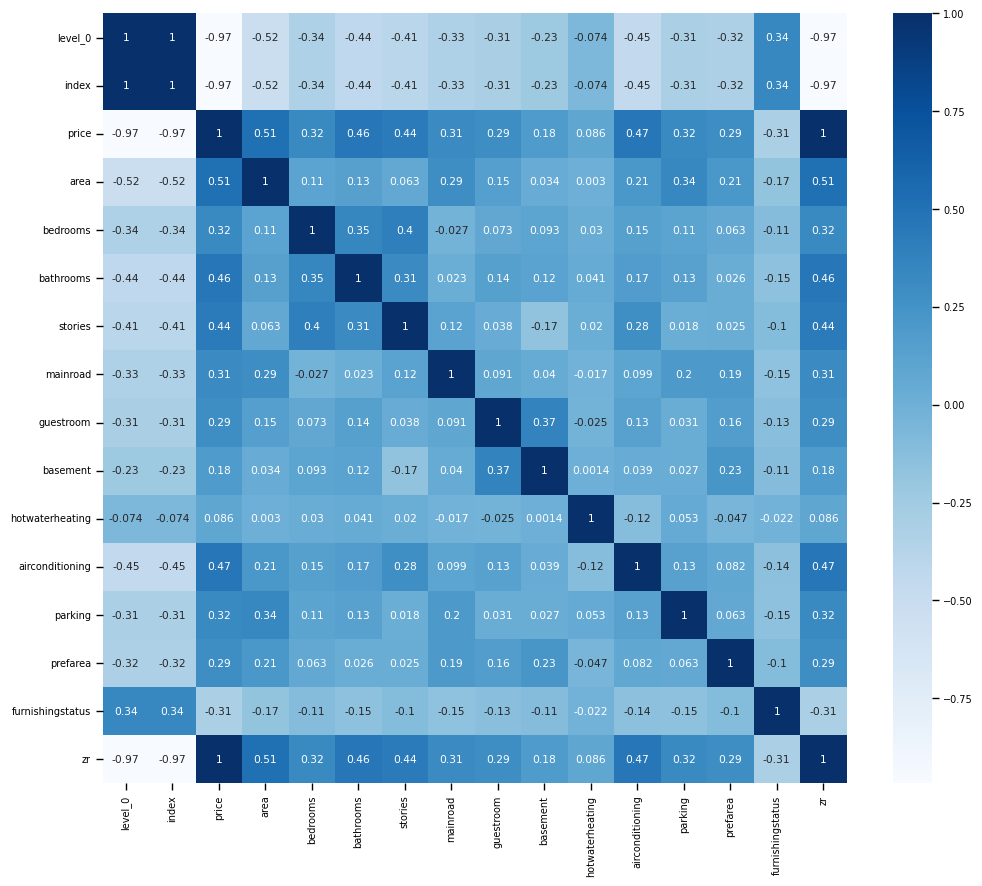

In [21]:
# CORRELATION BETWEEN FEATURS
plt.figure(figsize = (12,10))
sns.set_context ('paper', font_scale = 0.8)
correlation = new.corr()
sns.heatmap(correlation, annot = True, cmap = 'Blues')

In [22]:
# DEPENDENT AND INDEPENDENT VARIABLES
x = new.drop(['price','level_0','index','zr'], axis = 1)
y = new['price']
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8500,3,2,4,1,0,0,0,1,2,0,0
1,4600,3,2,2,1,1,0,0,1,2,0,0
2,6420,3,2,2,1,0,0,0,1,1,1,1
3,4320,3,1,2,1,0,1,1,0,2,0,1
4,7155,3,2,1,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
523,3000,2,1,1,1,0,1,0,0,2,0,2
524,2400,3,1,1,0,0,0,0,0,0,0,1
525,3620,2,1,1,1,0,0,0,0,0,0,2
526,2910,3,1,1,0,0,0,0,0,0,0,0


In [23]:
# DEVIDED TO TRAIN AND TEST 
from sklearn.model_selection import train_test_split

In [24]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [25]:
y_train

19     8043000
353    3640000
56     6685000
204    4767000
501    2450000
        ...   
71     6475000
106    5950000
270    4200000
435    3150000
102    5950000
Name: price, Length: 396, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
print(reg.intercept_)
print(reg.coef_)

833030.2566211331
[ 1.90653406e+02  6.45313776e+04  7.70914224e+05  4.15483854e+05
  4.42744351e+05  4.38435866e+05  2.97463856e+05  8.30379661e+05
  8.91120591e+05  1.88834637e+05  3.74662467e+05 -1.91115508e+05]


In [29]:

y_predict = reg.predict(x_test)
y_predict

array([6400089.2903453 , 3858751.37147175, 6527399.38177489,
       3667624.26014671, 5232608.43758807, 4132772.58802653,
       3423035.27199628, 2379873.26215074, 4043563.93303395,
       6260432.72816458, 4345534.93025352, 5443008.60320647,
       6363358.42078383, 3554726.69405073, 5525290.51964415,
       4469800.10651628, 6329661.95412315, 5853537.80592181,
       3409980.31408778, 5230535.71826967, 6284729.28033654,
       4440603.61439289, 3956256.16769997, 3184458.31588072,
       4060829.61766583, 5423517.51734385, 3744993.29078066,
       5902404.89234884, 4692874.49919817, 4410954.95077261,
       6755617.37802456, 5742850.52477809, 4716594.35124261,
       3325880.23054204, 6992817.83488354, 4139598.00420323,
       3522175.04334139, 3990257.10779796, 7627620.3174767 ,
       5551170.19033833, 6721659.94615745, 4606326.69657283,
       4035450.04130219, 3438256.25460327, 5112574.96515864,
       2767823.88050006, 4724522.78894929, 5004973.47699429,
       4882837.15159136,

Text(0.5, 1.0, 'y_test vs y_predict')

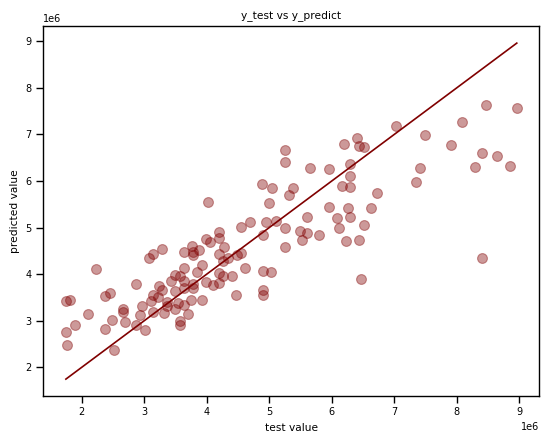

In [30]:

plt.scatter(y_test,y_predict,c = 'maroon',s = 50,alpha = 0.4)
x = y
plt.plot(x,y,c = 'maroon')
plt.xlabel('test value')
plt.ylabel('predicted value')
plt.title('y_test vs y_predict')


In [31]:
from sklearn.metrics import r2_score,mean_absolute_error
mae = mean_absolute_error(y_test,y_predict)
score = r2_score(y_test,y_predict)

In [32]:
mae

698507.2968654461

In [33]:
score

0.7014911953910303